In [22]:
from IPython.display import display, HTML

display(HTML('''
<style>
/* Make notebook container stretch full width */
.container {
    width: 100% !important;
    max-width: 100% !important;
}

/* Stretch markdown text to full width */
.text_cell_render {
    max-width: 100% !important;
    width: 100% !important;
}
</style>
'''))

This is a study following another study with the same dataset. It was previously used with a Linear Regression model to try and predict the values of house prices. The same test is done in here, but with other models.

In [23]:
%pip install plotly
#%pip install cufflinks
#%pip install chart-studio

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import RobustScaler
from time import time

# Data Analysis

In [25]:
base_casa = pd.read_csv('https://drive.google.com/uc?export=download&id=1cYpnXpTiSG7grLe2D0gYNUfOFxi5aLsF')
base_casa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [26]:
base_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


There aren't any null values in this dataframe.

In [27]:
base_casa.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [28]:
# Checking boxplot of one of the features
fig = px.box(base_casa, x="Avg. Area Income")
fig.show()

In [29]:
# Checking boxplot of the target
fig = px.box(base_casa, x="Price")
fig.show()

Removing spaces from the title of the columns is a good practice.

In [30]:
# get the name of the columns
base_casa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [31]:
# replacing spaces for underlines for better practices
base_casa = base_casa.rename(columns={"Avg. Area Income":"Avg_Area_Income", "Avg. Area House Age":"Avg_Area_House_Age","Avg. Area Number of Rooms":"Avg_Area_Number_of_Rooms", "Avg. Area Number of Bedrooms":"Avg_Area_Number_of_Bedrooms","Area Population":"Area_Population"})
base_casa.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


The ```Address``` column doesn't have any value in this case.

In [32]:
base_casa.drop(["Address"], axis=1, inplace=True)

Checking the correlations between Price and features.

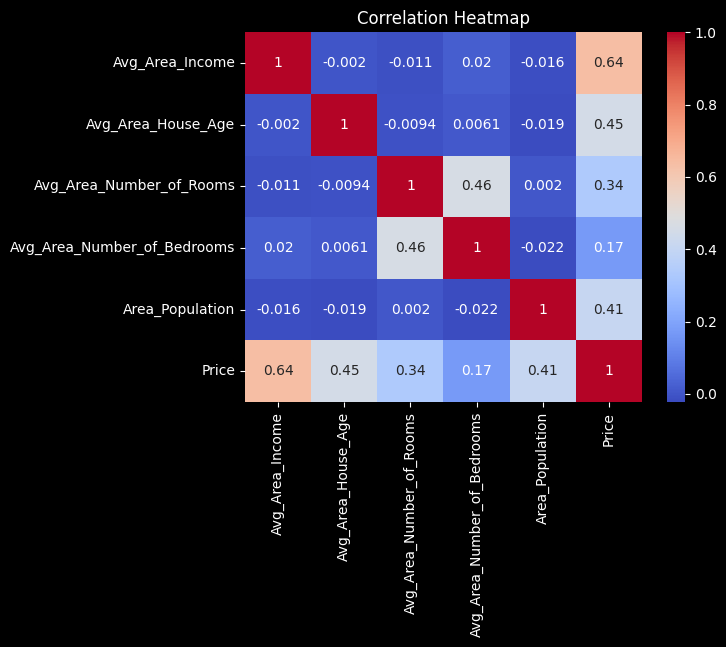

In [33]:
# Set the overall background color to dark
plt.style.use('dark_background')

# Create the heatmap
sns.heatmap(base_casa.corr(), annot=True, cmap='coolwarm')

# Optional: Customize further for cleaner look
plt.title('Correlation Heatmap', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

```Avg_Area_Income```, ```Avg_Area_House_Age```, and ```Area_Population``` are mildly correlated with ```Price```.

```Avg_Area_Number_of_Rooms``` and ```Avg_Area_Number_of_Bedrooms``` are mildly correlated with each other but weakly correlated with ```Price```.

In [34]:
base_casa.shape

(5000, 6)

We have 5000 observations.

# Modelling

In [35]:
# Separating X features and y target
X = base_casa.drop(["Price","Avg_Area_Number_of_Bedrooms"], axis=1)
y = base_casa["Price"]

Something to keep in mind here, metrics for regression models:

| Metric                     | Description                                                  | When to Use                                              |
|----------------------------|--------------------------------------------------------------|-----------------------------------------------------------|
| **MAE** (Mean Absolute Error) | Average of absolute errors                                  | When you want all errors treated equally                  |
| **MSE** (Mean Squared Error)  | Average of squared errors                                    | When larger errors should be penalized more               |
| **RMSE** (Root Mean Squared Error) | Square root of MSE                                         | Like MSE, but in the same units as the target variable    |
| **R²** (R-squared / Coefficient of Determination) | Proportion of variance explained by the model | When you want to measure how well your model explains the variability |


In [36]:
# # splitting data to check results on unseen data
# X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf = RandomForestRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [100, 300, 500],         # Number of trees (more = better performance, slower training)
#     'max_depth': [5, 30, 50],         # Limit depth to prevent overfitting
#     'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
#     'min_samples_leaf': [1, 2, 4],           # Minimum samples at a leaf node (helps generalize)
#     'max_features': [None, 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

# grid_search.fit(X_trainval, y_trainval)

# # Best estimator and score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# best_model = grid_search.best_estimator_

# # predictions on unseen data to evaluate better the results
# y_pred = best_model.predict(X_test)

# # Evaluate
# from sklearn.metrics import mean_squared_error, r2_score
# print("Unseen Test R²:", r2_score(y_test, y_pred))

O código acima foi comentado para evitar reexecução, os resultados foram os seguintes:
```
Best parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best score: 0.8845817157973347
Unseen Test R²: 0.8886205234322455
```

In [37]:
best_rf = RandomForestRegressor(bootstrap=True, max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=300)

In [38]:
# Let's train and predict on all unseen data using cross_val_predict in order to make a unbiased comparison with the Linear Regression results
y_pred = cross_val_predict(best_rf, X, y, cv=5)
print("R2:", r2_score(y, y_pred))

R2: 0.8877888357092241


In [39]:
test_train = cross_validate(best_rf, X, y, cv=5, scoring=['r2'], return_train_score=True)
print(f"Test R² scores:  {test_train['test_r2']} \nTrain R² scores: {test_train['train_r2']}")

Test R² scores:  [0.88973452 0.89031827 0.88485135 0.89154522 0.88118322] 
Train R² scores: [0.97460874 0.97446702 0.97504911 0.97396287 0.9750787 ]


The hyperparameter tuning on Random Forest did not improve significantly the prediction results. Linear Regression is still doing better at understanding this data's behaviour.

In [40]:
rf_results_df = pd.DataFrame({'y': y, 'y_pred': y_pred, 'residuals': y - y_pred})

# Display the DataFrame
rf_results_df

,y,y_pred,residuals
0,1.059034e+06,1.279568e+06,-220534.296958
1,1.505891e+06,1.494897e+06,10993.476558
2,1.058988e+06,1.232564e+06,-173575.967646
3,1.260617e+06,1.094992e+06,165624.594252
4,6.309435e+05,7.986893e+05,-167745.844216
...,...,...,...
4995,1.060194e+06,1.022201e+06,37992.829144
4996,1.482618e+06,1.453381e+06,29236.942199
4997,1.030730e+06,1.098046e+06,-67316.132671
4998,1.198657e+06,1.292792e+06,-94135.228813


In [41]:
rf_residuals = base_casa.join(rf_results_df)

duplicates = rf_residuals['y'].duplicated()

print(duplicates.sum())

rf_residuals.set_index('y', inplace=True)
rf_residuals

0


,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,y_pred,residuals
y,,,,,,,,
1.059034e+06,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1.279568e+06,-220534.296958
1.505891e+06,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1.494897e+06,10993.476558
1.058988e+06,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1.232564e+06,-173575.967646
1.260617e+06,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1.094992e+06,165624.594252
6.309435e+05,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,7.986893e+05,-167745.844216
...,...,...,...,...,...,...,...,...
1.060194e+06,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,1.022201e+06,37992.829144
1.482618e+06,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,1.453381e+06,29236.942199
1.030730e+06,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,1.098046e+06,-67316.132671


In [42]:
#lr_folder = 'https://drive.google.com/drive/folders/1__hvtFCPOX8ZIZs6SuJsrrBOckneIEc6?usp=drive_link'
lr_sharelink = 'https://drive.google.com/file/d/1WDHOcB5lBtO-J6u2wAsxrEEM2f0VoWHp/view?usp=drive_link'
lr_residuals = pd.read_csv('https://drive.google.com/uc?export=download&id='+lr_sharelink.split('/d/')[1].split('/')[0])
lr_residuals.rename(columns={'residuals': 'lr_residuals', 'y_pred':'lr_y_pred'}, inplace=True)
lr_residuals.set_index('y', inplace=True)
lr_residuals.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,lr_y_pred,lr_residuals
y,,,,,,,,
1.059034e+06,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1.222336e+06,-163302.296364
1.505891e+06,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1.496366e+06,9525.075134
1.058988e+06,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1.252835e+06,-193847.000494
1.260617e+06,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1.120134e+06,140482.709941
6.309435e+05,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,8.449589e+05,-214015.394800


In [43]:
results_df = lr_residuals.join(rf_residuals[['y_pred','residuals']].add_prefix('rf_'), on='y')
results_df.reset_index(inplace=True)
results_df.head()

,y,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,lr_y_pred,lr_residuals,rf_y_pred,rf_residuals
0,1.059034e+06,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1.222336e+06,-163302.296364,1.279568e+06,-220534.296958
1,1.505891e+06,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1.496366e+06,9525.075134,1.494897e+06,10993.476558
2,1.058988e+06,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1.252835e+06,-193847.000494,1.232564e+06,-173575.967646
3,1.260617e+06,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1.120134e+06,140482.709941,1.094992e+06,165624.594252
4,6.309435e+05,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,8.449589e+05,-214015.394800,7.986893e+05,-167745.844216


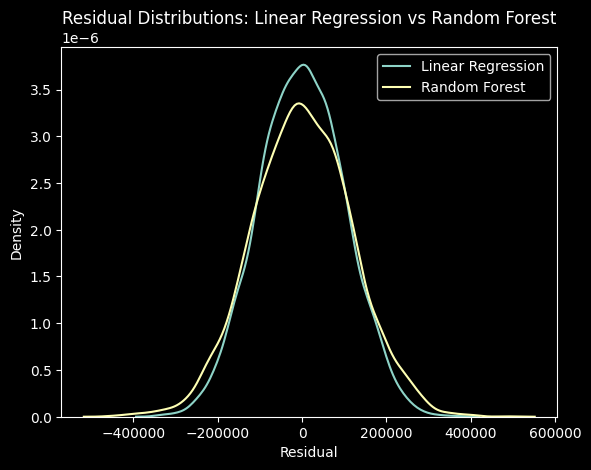

In [44]:
# Plot KDE curves for the two residuals
sns.kdeplot(results_df["lr_residuals"], label='Linear Regression', fill=False)
sns.kdeplot(results_df["rf_residuals"], label='Random Forest', fill=False)


plt.legend()
plt.title('Residual Distributions: Linear Regression vs Random Forest')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.style.use('default')
plt.show()

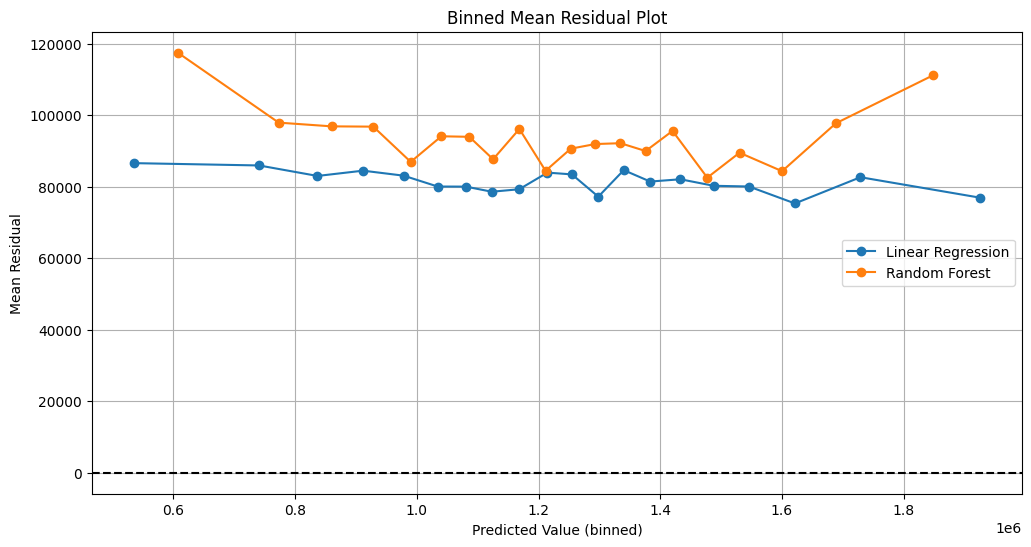

In [45]:
def plot_binned_residuals(y_true, y_pred, label):
    df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    df['residual'] = df['y_true'] - df['y_pred']
    df['abs_residual'] = np.abs(df['residual'])

    # Bin by predicted values
    df['bin'] = pd.qcut(df['y_pred'], q=20, duplicates='drop')  # 20 quantile bins
    bin_means = df.groupby('bin', observed=True).mean(numeric_only=True)

    plt.plot(bin_means['y_pred'], bin_means['abs_residual'], label=label, marker='o')

# Plot both models
plt.figure(figsize=(12, 6))
plot_binned_residuals(results_df["y"], results_df["lr_y_pred"], 'Linear Regression')
plot_binned_residuals(results_df["y"], results_df["rf_y_pred"], 'Random Forest')

plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Value (binned)")
plt.ylabel("Mean Residual")
plt.title("Binned Mean Residual Plot")
plt.legend()
plt.grid(True)
plt.show()

Conclusion:

This study showed that even with hyperparameter tuning, Linear Regression still performs better than Random Forest. This may be due to the simplicity of the feature-target relationship.

In [46]:
# from google.colab import files

# # Save the DataFrame to a CSV file
# results_df.to_csv('lrrf_housing.csv', index=False)

# # Download the file
# files.download('lrrf_housing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>